# Census Data Analysis ~ Obi Eke

I used the *pip install ucimlrepo* command so that I can import the dataset directly

In [129]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from ucimlrepo import fetch_ucirepo 
from scipy.stats import chi2_contingency

# fetch dataset 
census_income = fetch_ucirepo(id=20) 
  
# dataframes
X = census_income.data.features 
y = census_income.data.targets 

# combining dataframes & clean up
df = X.join(y)
df = df.dropna()

print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# Exploratory Data Analysis
Looking at the data, there are a lot of different attributes we can compare. The census collects information such as race, gender, marital status, age, education level, and more. In the cell above, we can see the measures of center and variation for the numerical attributes in the dataset. If we wanted to compare something simple, like the counts of males and females in our data, we could use a bar graph to show this distribution. If we wanted to be more specific, we could also use a bar graph to show the distribution of individuals based on their relationship status and gender.

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  47621.000000  4.762100e+04   47621.000000  47621.000000  47621.000000   
mean      38.640684  1.897271e+05      10.090821   1091.137649     87.853489   
std       13.558961  1.055695e+05       2.568320   7487.228336    404.010612   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175840e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782820e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.377200e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    47621.000000  
mean        40.600050  
std         12.260345  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
sex
Male      31937
Female    15684
Name: count, dtype: int64


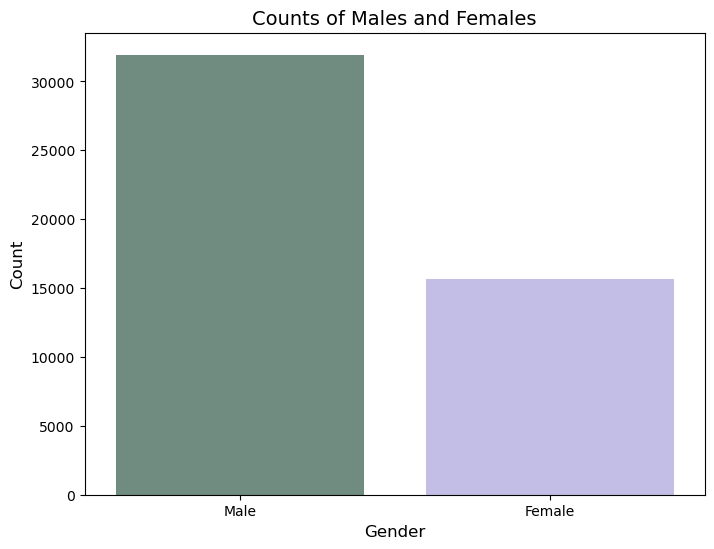

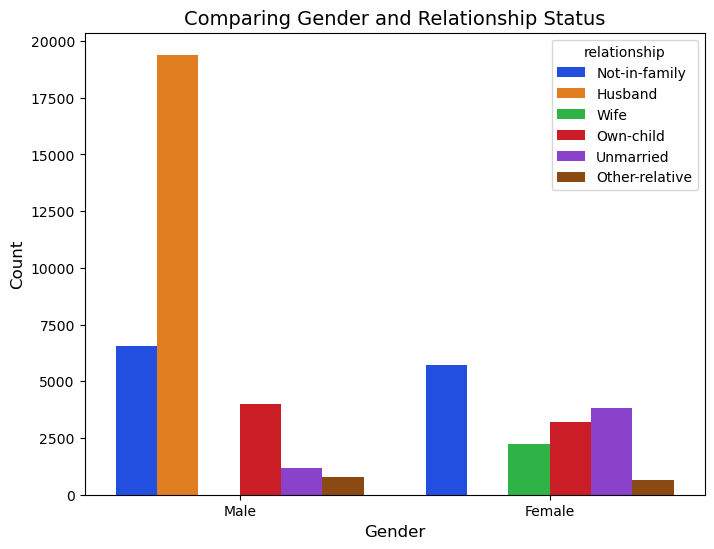

In [128]:
print(df.describe())
print(df['sex'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex', hue='sex', palette= custom_colors)
plt.title('Counts of Males and Females', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

plt.figure(figsize=(8, 6))
custom_colors = ['#6B9080', '#BEB8EB']
sns.countplot(data=df, x='sex', hue='relationship', palette= 'bright')
plt.title('Comparing Gender and Relationship Status', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Hypothesis 1 (Education & Income)
High school graduates are more likely to have an income of >50K than people who did not graduate high school or have not yet graduated. (The minimum age of the dataset is 17 so people who are still in high school are included.)

(Since I will be finding the p-value to prove/disprove this hypothesis, I'm including the null/alternative hypotheses here)

**Null hypothesis**: There is no significant difference between the education levels of people who have an income of <=50K and people who have an income of >50k.
**Alternative hypothesis**: The is a significant difference between the education levels of people who have an income of <=50K and people who have an income of >50K.

          count       mean       std  min   25%   50%   75%   max
income                                                           
<=50K   36080.0   9.607345  2.435511  1.0   9.0   9.0  10.0  16.0
>50K    11541.0  11.602287  2.378859  1.0  10.0  12.0  13.0  16.0
Chi-square statistic: 6353.002
p-value: 0.000


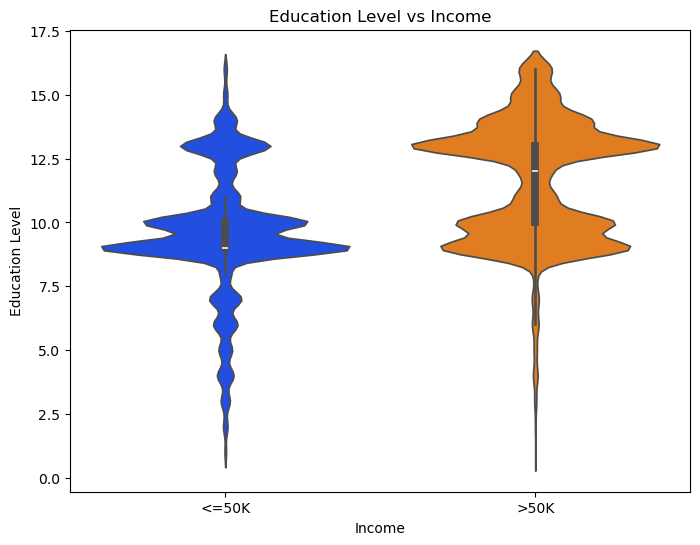

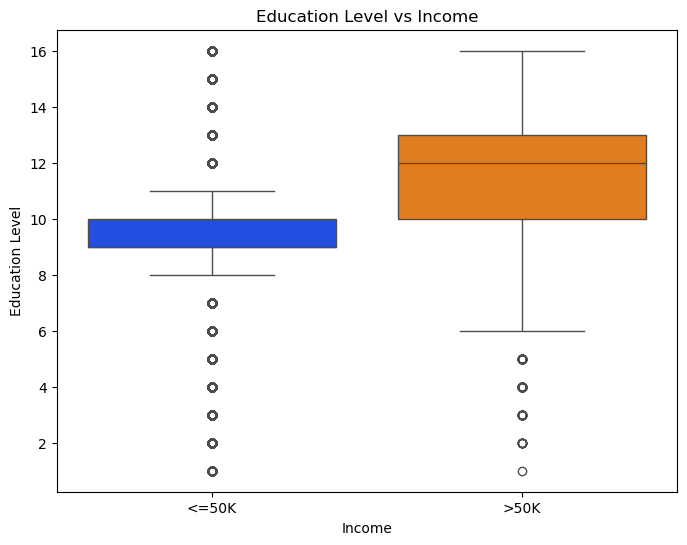

In [100]:
# There's a period at the end of some of the income values; I'm cleaning those up here
df['income'] = df['income'].str.strip().str.replace('.', '', regex=False)

edunum = df['education-num'].to_list()
income = df['income'].to_list()

# stats
print(df.groupby('income')['education-num'].describe())

# chi square test
contingency_table = pd.crosstab(df['income'], df['education-num'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.3f}")

# graphs
plt.figure(figsize=(8, 6))
sns.violinplot(y='education-num', x='income', data=df, hue='income', palette='bright')
plt.title('Education Level vs Income')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y='education-num', x='income', data=df, hue='income', palette='bright', legend=False)
plt.title('Education Level vs Income')
plt.xlabel('Income')
plt.ylabel('Education Level')
plt.show()


## Explanation:
I chose a chi square test to find the relationship between education level and income because we are looking at categorical data here. I also chose a violin plot to showcase this data because it allows us to compare key features of each group like median, min, max, and each quartile, but it also shows the distribution of the data. I initially chose a basic box plot to show this data, but it didn't show the median of the <=50K box. However, I still kept it because it's still helpful for comparing the range of the data sets.

## Conclusion:
The chi square test, which gave us a high chi square value of 6353.002, shows that there is an association between education level and income. The p-value, which is less than 0.05, tells us that there is a significant difference between the groups. The graphs also reflect this relationship. The violin plot shows that the majority of individuals who make more than \$50,000 a year have graduated high school while the majority of individuals who make less than or equal to \\$50,000 a year did not graduate high school or have not yet graduated high school. There is a relationship between education level and income and we can conclude that the difference between people who make less than or equal to \\$50,000 a year and people who make more than \\$50,000 is statistically significant.

# Hypothesis 2
The older a person gets, the more capital gain they will accrue.

Pearson Correlation Coefficient: 0.078


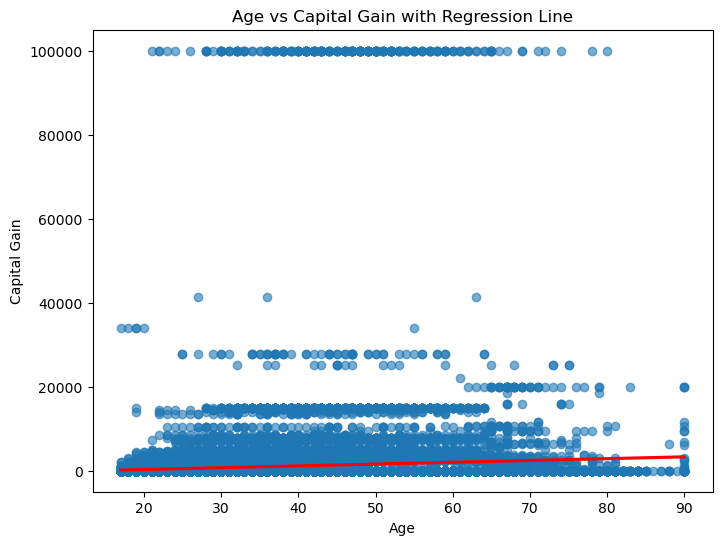

In [130]:
age = df['age'].tolist()
cg = df['capital-gain'].tolist()

# calculating correlation coefficient
corr = df['age'].corr(df['capital-gain'], method='pearson')
print(f"Pearson Correlation Coefficient: {corr:.3f}")

# graph
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='capital-gain', data=df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Age vs Capital Gain with Regression Line')
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.show()

## Explanation:
I used a correlation coefficient to find the relationship between age and capital gain because we are comparing quantitative data here. The correlation coefficient is 0.078. I also used a scatter plot with a regression line to show the relationship (or lack thereof) between age and capital gain.
## Conclusion: 
The correlation coefficient is very small, indicating that there is little to no correlation between between age and capital gain. The scatter plot and regression line also reflect this. The regression line is almost horizontal, meaning that there is no relationship between age and capital gain. The scatter plot also has no pattern that would indicate a relationship between the attributes.

# Summary 
I chose two hypotheses to prove (or disprove) within the census dataset. For my first hypothesis, comparing education levels and income, I used a chi square test and a violin plot to prove that higher education levels are associated with higher incomes. For my second hypothesis, comparing age and capital gain, I used a correlation coefficient to find the relationship between these attributes. I found that my hypothesis was incorrect because the correlation coefficient was so small. I can conclude that there is no relationship between age and capital gain.